# Predicting Wine Quality

### Module

In [213]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mglearn
import graphviz
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()
print('shape of dataset is :', dataset.shape)

shape of dataset is : (1599, 12)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
X = dataset.drop(['quality'],axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
Y = pd.DataFrame(dataset.quality , columns=['quality'])
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


# Data Visualization

### Countplot

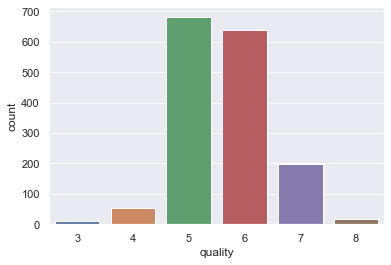

Number of labels are : [  0   0   0  10  53 681 638 199  18]


In [8]:
sns.countplot(dataset['quality'])
plt.show()
lables = np.bincount(dataset['quality'])
print("Number of labels are : %s" % lables)

### Density plot

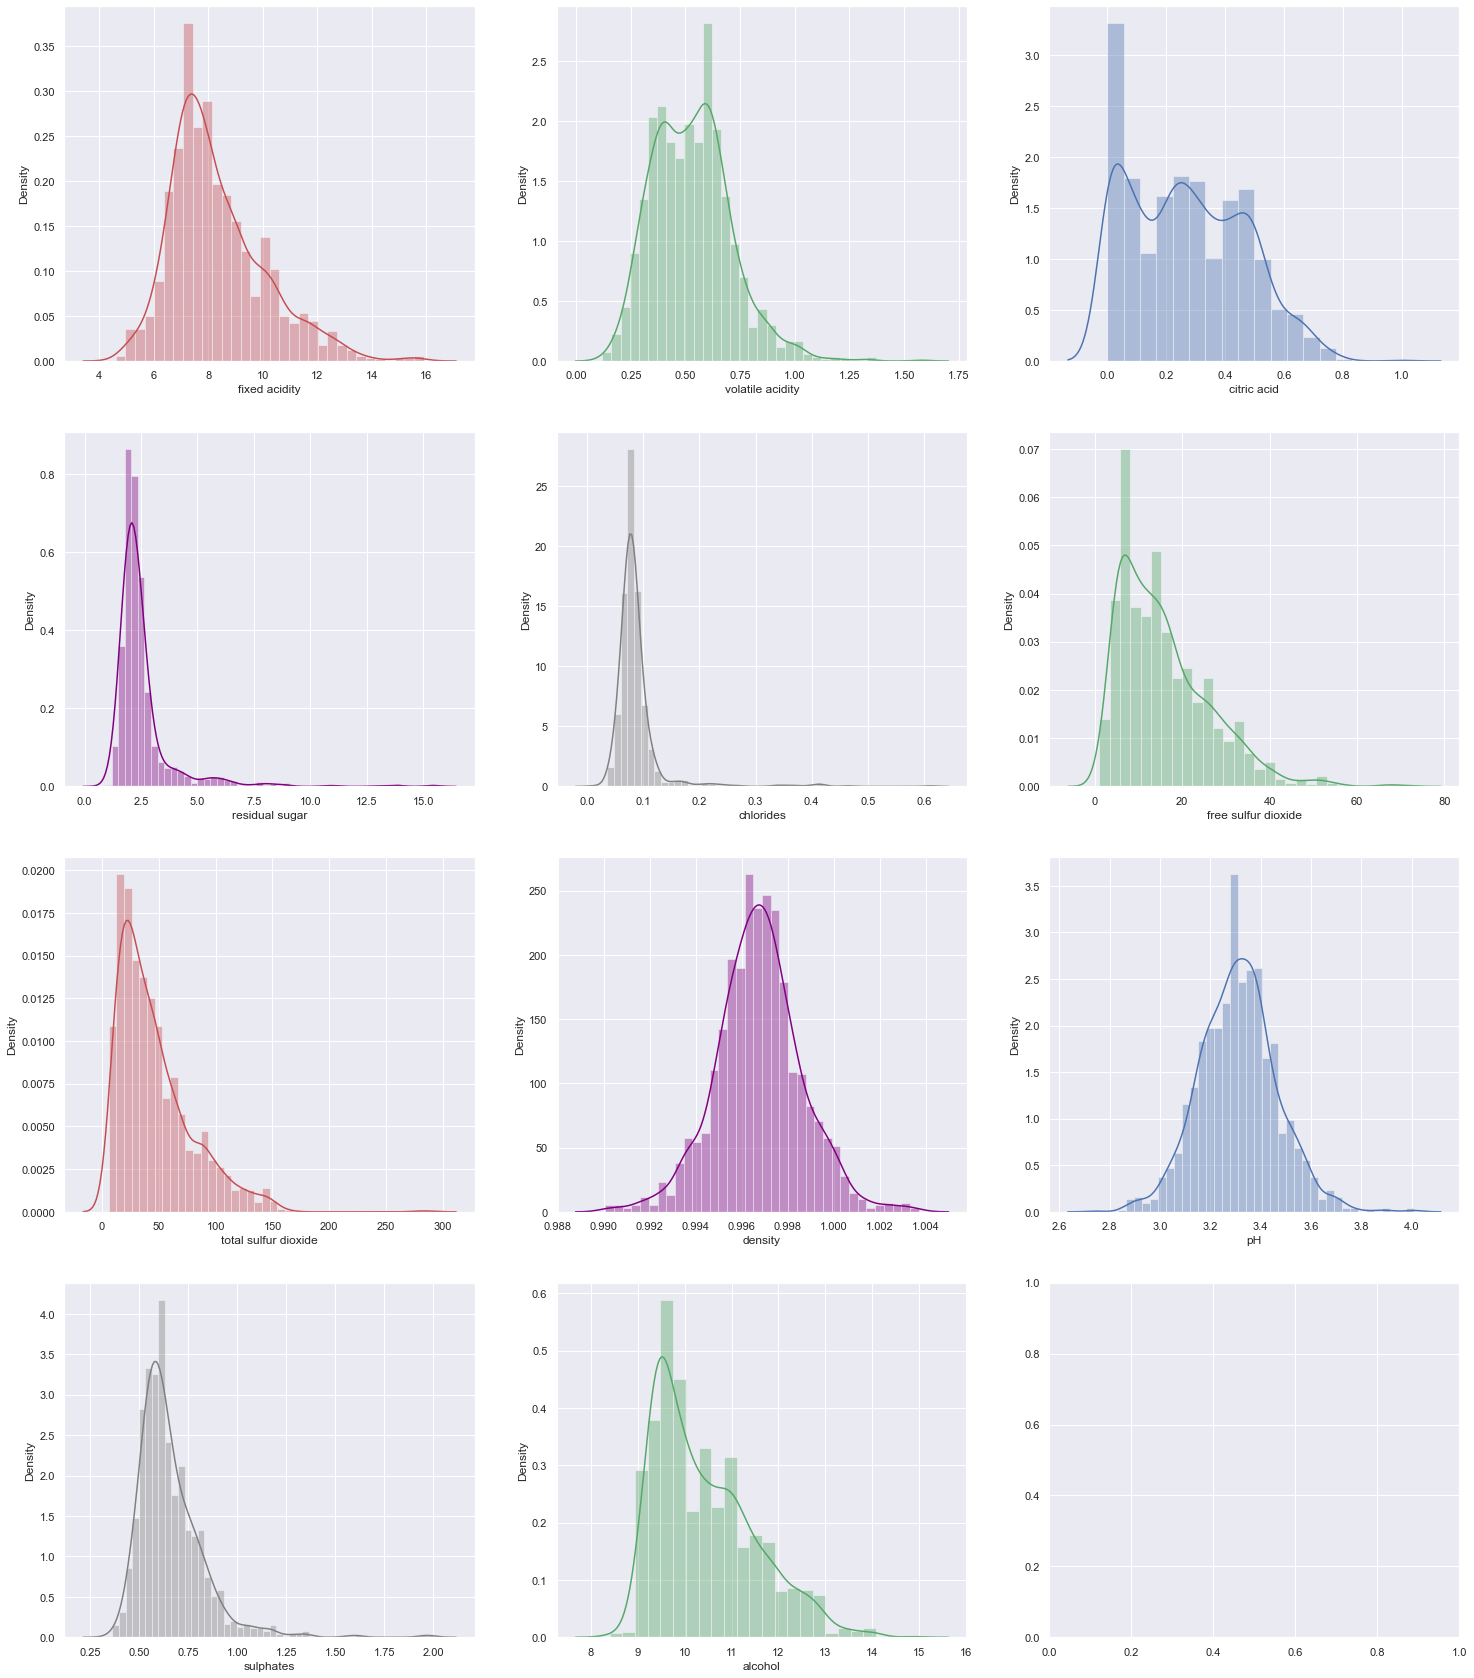

In [220]:
figure , ax = plt.subplots(4,3,figsize=(25,30))
sns.distplot(dataset['fixed acidity'],ax=ax[0,0],color='r')
sns.distplot(dataset['volatile acidity'],ax=ax[0,1],color='g')
sns.distplot(dataset['citric acid'],ax=ax[0,2],color='b')
sns.distplot(dataset['residual sugar'],ax=ax[1,0],color='purple')
sns.distplot(dataset['chlorides'],ax=ax[1,1],color='gray')
sns.distplot(dataset['free sulfur dioxide'],ax=ax[1,2],color='g')
sns.distplot(dataset['total sulfur dioxide'],ax=ax[2,0],color='r')
sns.distplot(dataset['density'],ax=ax[2,1],color='purple')
sns.distplot(dataset['pH'],ax=ax[2,2],color='b')
sns.distplot(dataset['sulphates'],ax=ax[3,0],color='gray')
sns.distplot(dataset['alcohol'],ax=ax[3,1],color='g')
plt.show()

### Pair plot

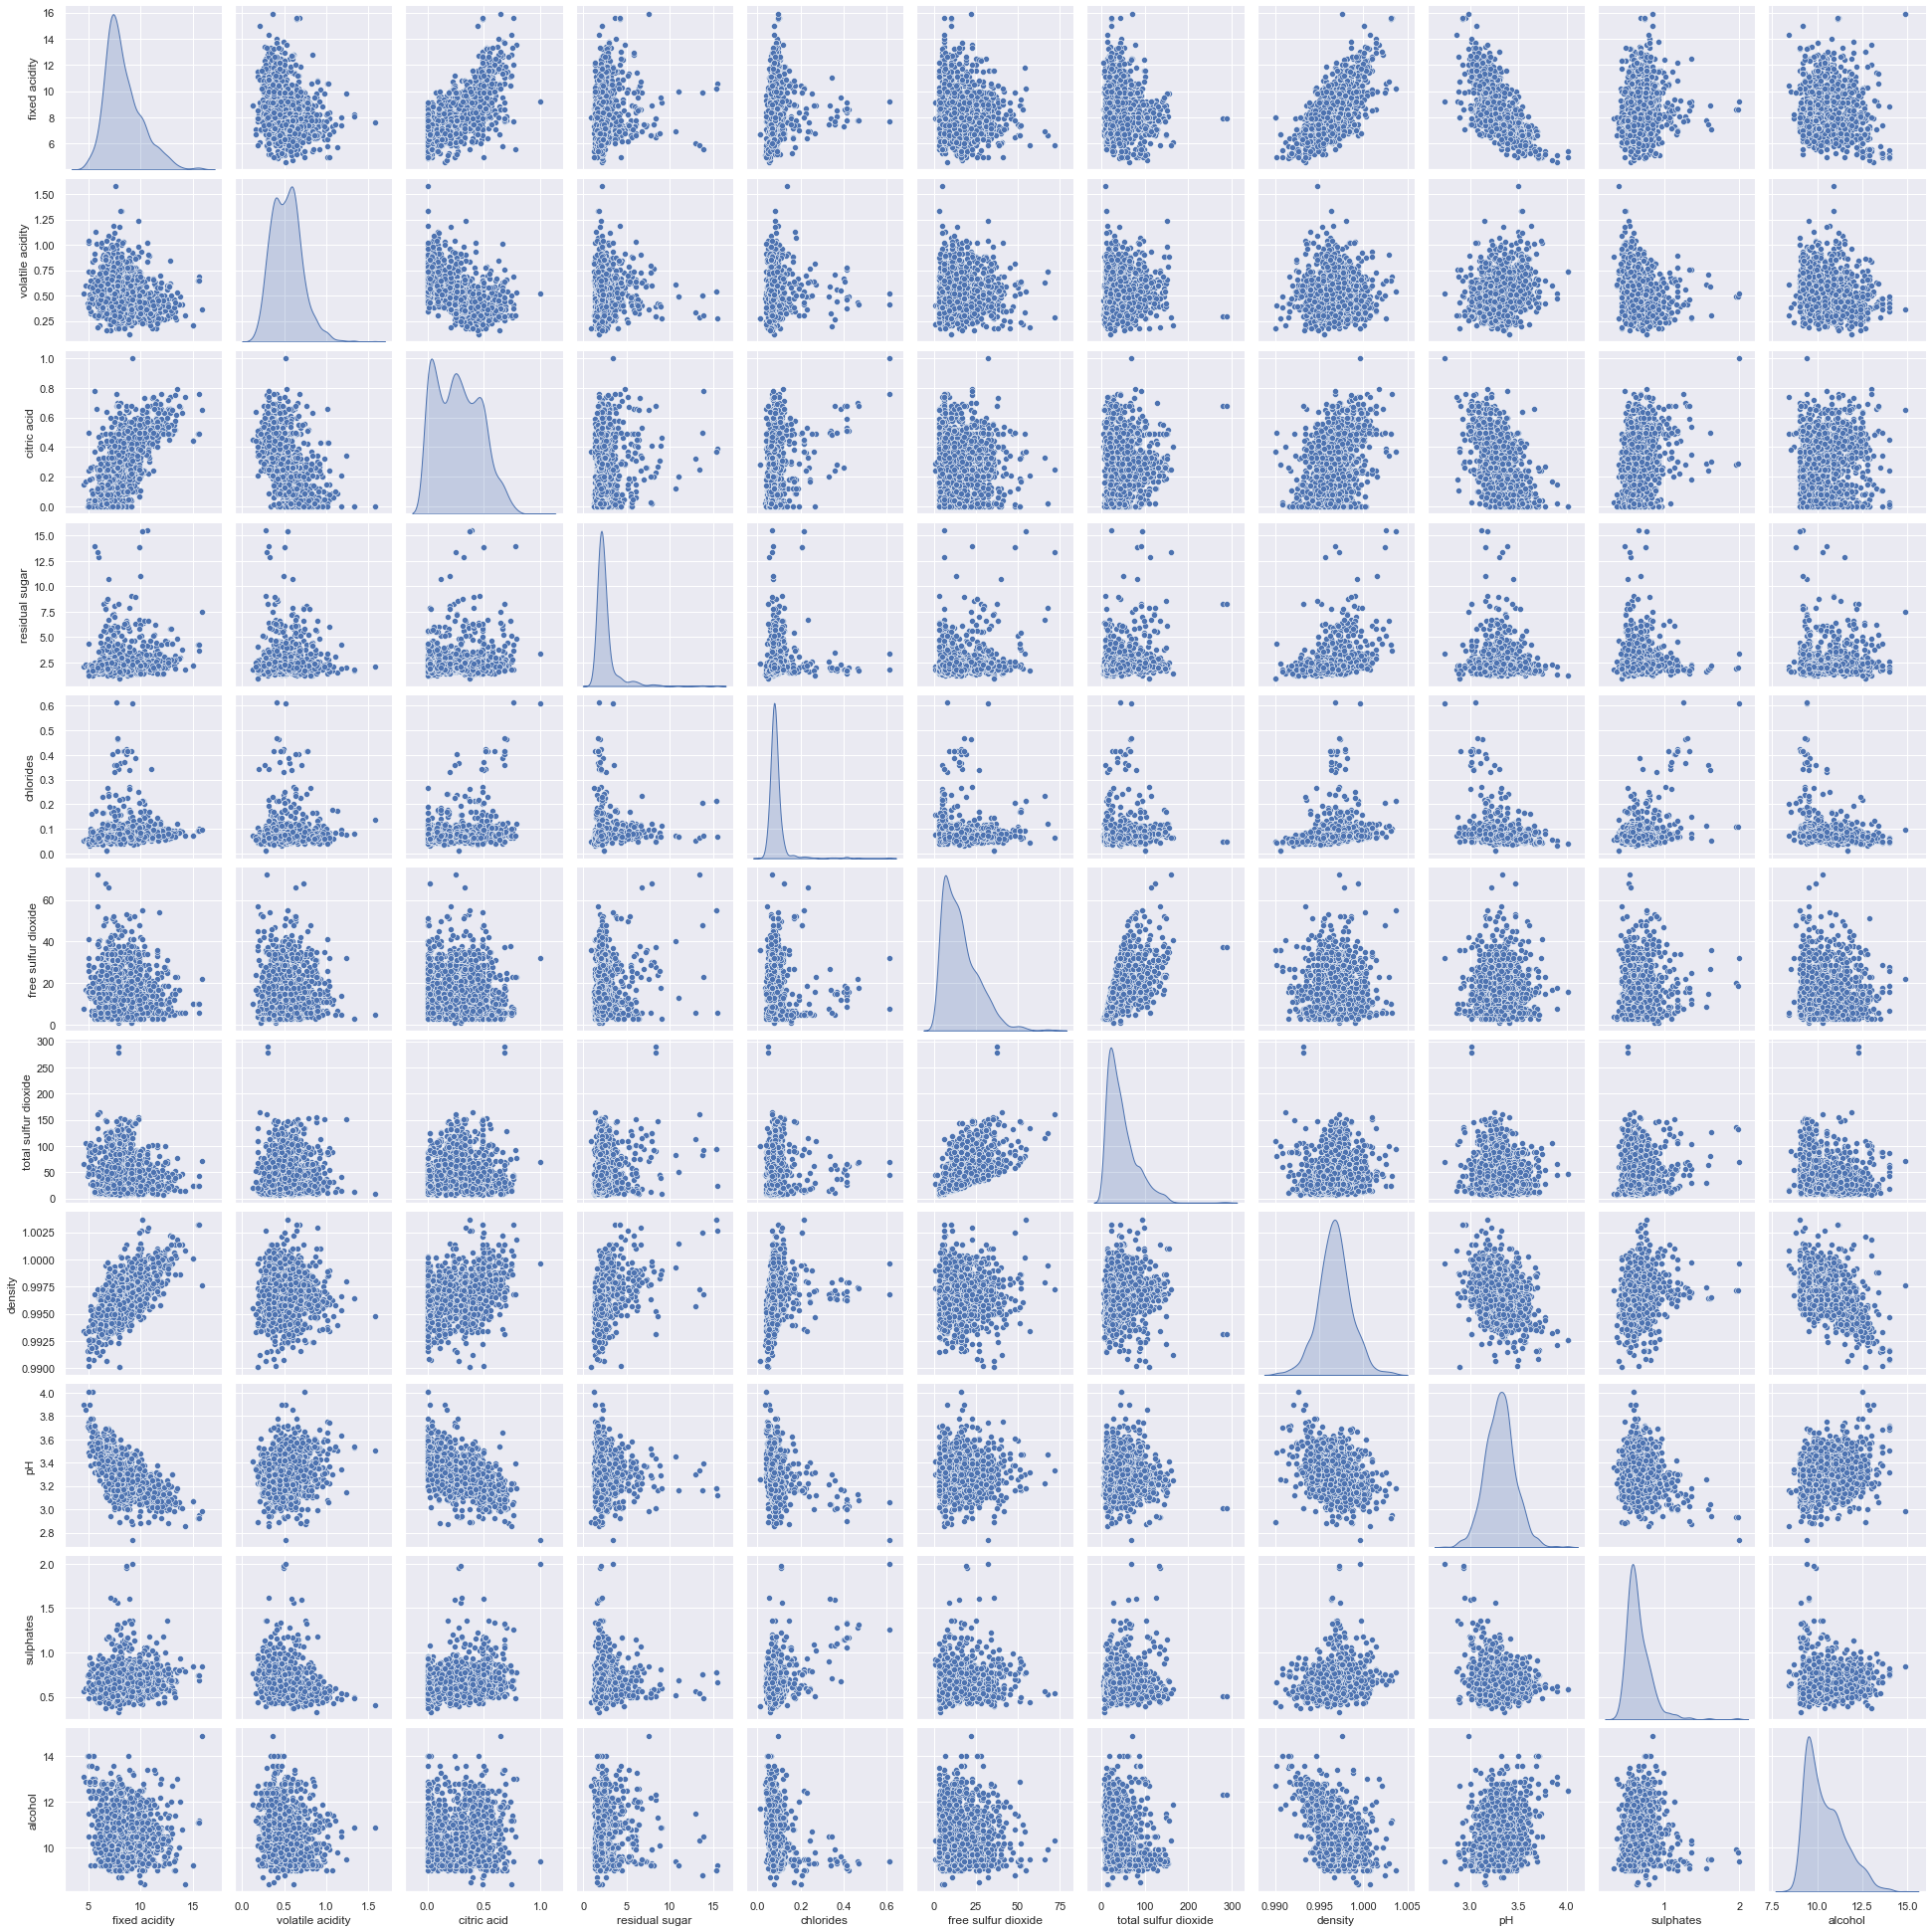

In [221]:
sns.pairplot(dataset.drop(['quality'],axis=1),diag_kind='kde')
plt.show()

### Heat map

# Data Preprocessing

### Scaling Data

In [9]:
sc = StandardScaler()
X1 = pd.DataFrame(sc.fit_transform(X))
X1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


### Splitting Dataset

In [10]:
x_train , x_test , y_train , y_test = train_test_split(X1,Y,test_size=0.2,random_state=0)
(x_train.shape , x_test.shape)

((1279, 11), (320, 11))

# Classification Methods

```
We Will use following Methods : 

1.KNN
2.Decision Classifier
3.Random Forest
4.Naive Bays
5.Neural Network
6.SVM

```

# 1. KNN

### How KNN Works

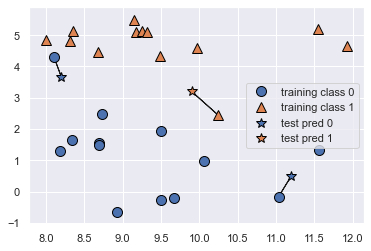

In [224]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

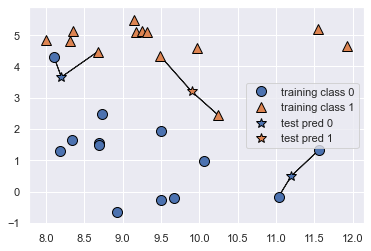

In [225]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

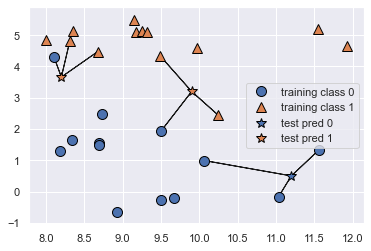

In [226]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [12]:
train_acc = []
test_acc = []

K = range(1,11)

for k in K:
    
    model_1 = KNeighborsClassifier(n_neighbors=k)
    model_1.fit(x_train,y_train)
    test_Acc = model_1.score(x_test,y_test)
    train_Acc = model_1.score(x_train,y_train)
    train_acc.append(train_Acc)
    test_acc.append(test_Acc)
    print("Train Accuracy For k= {} is : {:.2f}%".format(k,train_Acc*100))
    print("Test Accuracy For k= {} is : {:.2f}%".format(k,test_Acc*100))
    print()

Train Accuracy For k= 1 is : 100.00%
Test Accuracy For k= 1 is : 64.69%

Train Accuracy For k= 2 is : 81.16%
Test Accuracy For k= 2 is : 60.62%

Train Accuracy For k= 3 is : 76.62%
Test Accuracy For k= 3 is : 57.50%

Train Accuracy For k= 4 is : 71.70%
Test Accuracy For k= 4 is : 58.44%

Train Accuracy For k= 5 is : 69.66%
Test Accuracy For k= 5 is : 60.62%

Train Accuracy For k= 6 is : 67.47%
Test Accuracy For k= 6 is : 60.94%

Train Accuracy For k= 7 is : 65.75%
Test Accuracy For k= 7 is : 55.62%

Train Accuracy For k= 8 is : 65.52%
Test Accuracy For k= 8 is : 57.19%

Train Accuracy For k= 9 is : 64.89%
Test Accuracy For k= 9 is : 56.88%

Train Accuracy For k= 10 is : 64.27%
Test Accuracy For k= 10 is : 56.88%



### k=1 we got better Accuracy

In [13]:
model_1 = KNeighborsClassifier(n_neighbors=1)
clf = model_1.fit(x_train,y_train)
y_pred_1 = model_1.predict(x_test)
print("Test Accuracy For our model is : {:.2f}%".format(model_1.score(x_test,y_test)*100))
#mglearn.plots.plot_2d_separator(clf, X1, fill=True, eps=0.5, alpha=.4)
#mglearn.plots.plot_2d_separator(X[:,'fixed acidity'],X[:,'volatile acidity'],Y['quality'])

Test Accuracy For our model is : 64.69%


### Confusion matrix and classification report

[[ 0  0  1  1  0  0]
 [ 0  1  3  6  1  0]
 [ 0  2 98 31  3  1]
 [ 0  2 35 88 15  2]
 [ 0  0  1  4 20  2]
 [ 0  0  1  1  1  0]]


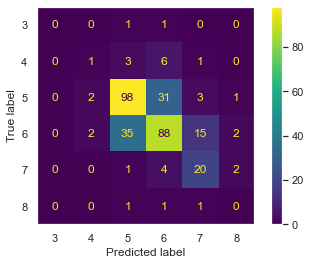

In [15]:
sns.set(color_codes=False)
model_1_matrix = confusion_matrix(y_test,y_pred_1)
plot_confusion_matrix(model_1,x_test,y_test)
plt.grid(False)
print(model_1_matrix)

In [16]:
model_1_report = classification_report(y_test,y_pred_1)
print(model_1_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.09      0.13        11
           5       0.71      0.73      0.72       135
           6       0.67      0.62      0.64       142
           7       0.50      0.74      0.60        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.35      0.36      0.35       320
weighted avg       0.64      0.65      0.64       320



### Prediction

In [17]:
y_test[:5].to_numpy()

array([[6],
       [5],
       [7],
       [6],
       [5]])

In [18]:
y_pred_1[:5]

array([5, 5, 7, 5, 5])

### Train Acc and Test Acc vs K-values 

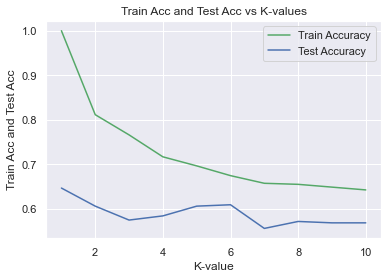

In [19]:
plt.plot(K,train_acc,'g',label='Train Accuracy')
plt.plot(K,test_acc,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs K-values")
plt.xlabel("K-value")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

# 

# Decision Classifier

### How Decision Classifier Works

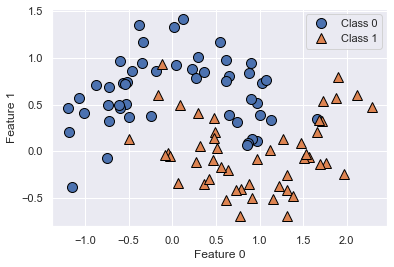

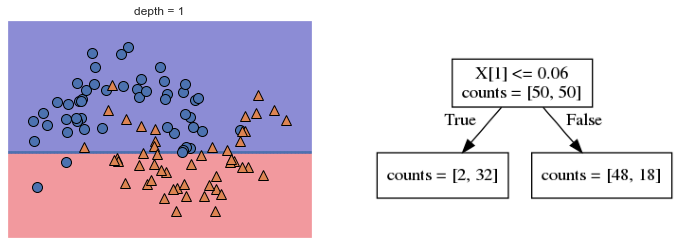

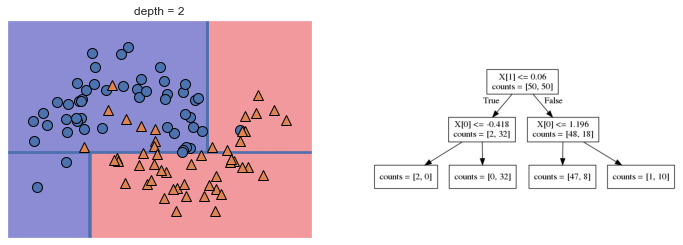

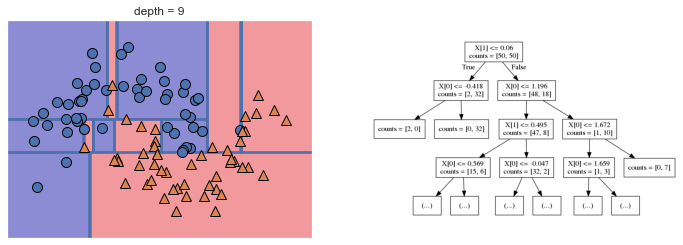

In [234]:
mglearn.plots.plot_tree_progressive()

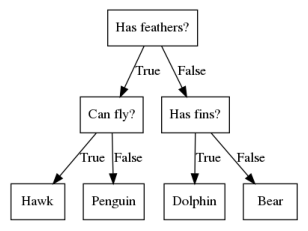

In [235]:
mglearn.plots.plot_animal_tree()

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
train_acc_1 = []
test_acc_1 = []

depth = range(1,20)

for i in depth:
    model_2 = DecisionTreeClassifier(max_depth=i)
    model_2.fit(x_train,y_train)
    test_Acc = model_2.score(x_test,y_test)
    train_Acc = model_2.score(x_train,y_train)
    train_acc_1.append(train_Acc)
    test_acc_1.append(test_Acc)
    print("Train Accuracy For d= {} is : {:.2f}%".format(i,train_Acc*100))
    print("Test Accuracy For d= {} is : {:.2f}%".format(i,test_Acc*100))
    print()

Train Accuracy For d= 1 is : 54.89%
Test Accuracy For d= 1 is : 59.38%

Train Accuracy For d= 2 is : 56.84%
Test Accuracy For d= 2 is : 56.25%

Train Accuracy For d= 3 is : 58.17%
Test Accuracy For d= 3 is : 56.56%

Train Accuracy For d= 4 is : 62.08%
Test Accuracy For d= 4 is : 59.06%

Train Accuracy For d= 5 is : 64.97%
Test Accuracy For d= 5 is : 59.06%

Train Accuracy For d= 6 is : 68.88%
Test Accuracy For d= 6 is : 58.13%

Train Accuracy For d= 7 is : 75.22%
Test Accuracy For d= 7 is : 59.69%

Train Accuracy For d= 8 is : 80.77%
Test Accuracy For d= 8 is : 64.69%

Train Accuracy For d= 9 is : 86.32%
Test Accuracy For d= 9 is : 64.06%

Train Accuracy For d= 10 is : 91.09%
Test Accuracy For d= 10 is : 65.31%

Train Accuracy For d= 11 is : 94.76%
Test Accuracy For d= 11 is : 66.88%

Train Accuracy For d= 12 is : 96.95%
Test Accuracy For d= 12 is : 68.44%

Train Accuracy For d= 13 is : 97.89%
Test Accuracy For d= 13 is : 66.56%

Train Accuracy For d= 14 is : 98.36%
Test Accuracy For d

#### From Above we can say Max Test Accuracy we found is : 68.44% for depth =12

### For d=12 Test Accuracy

In [44]:
model_2 = DecisionTreeClassifier(max_depth=12)
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print("Test Accuracy For our model is : {:.2f}%".format(model_2.score(x_test,y_test)*100))

Test Accuracy For our model is : 69.69%


### Confusion matrix and classification report

[[  0   0   1   1   0   0]
 [  1   2   3   4   1   0]
 [  2   1 101  29   2   0]
 [  0   3  23 101  15   0]
 [  0   0   1   5  19   2]
 [  0   0   0   1   2   0]]


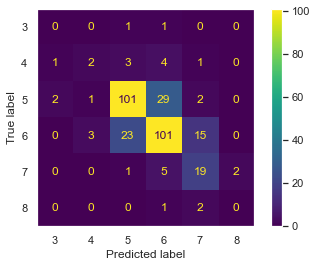

In [45]:
model_2_matrix = confusion_matrix(y_test,y_pred_2)
plot_confusion_matrix(model_2,x_test,y_test)
plt.grid(False)
print(model_2_matrix)

In [46]:
model_2_report = classification_report(y_test,y_pred_2)
print(model_2_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.18      0.24        11
           5       0.78      0.75      0.77       135
           6       0.72      0.71      0.71       142
           7       0.49      0.70      0.58        27
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.39      0.39      0.38       320
weighted avg       0.70      0.70      0.70       320



### Prediction

In [47]:
y_test[10:16].to_numpy()

array([[5],
       [5],
       [6],
       [5],
       [6],
       [6]])

In [48]:
y_pred_2[10:16]

array([5, 5, 6, 5, 6, 7])

### Train Acc and Test Acc vs Depth

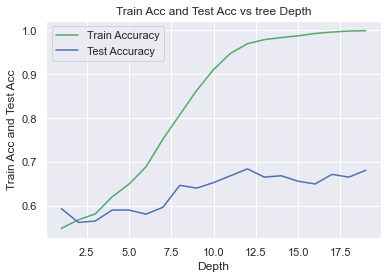

In [49]:
plt.plot(depth,train_acc_1,'g',label='Train Accuracy')
plt.plot(depth,test_acc_1,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs tree Depth")
plt.xlabel("Depth")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

#### Here only For Visualization We will draw a decision tree of depth 3

In [50]:
visual_model = DecisionTreeClassifier(max_depth=3)
visual_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

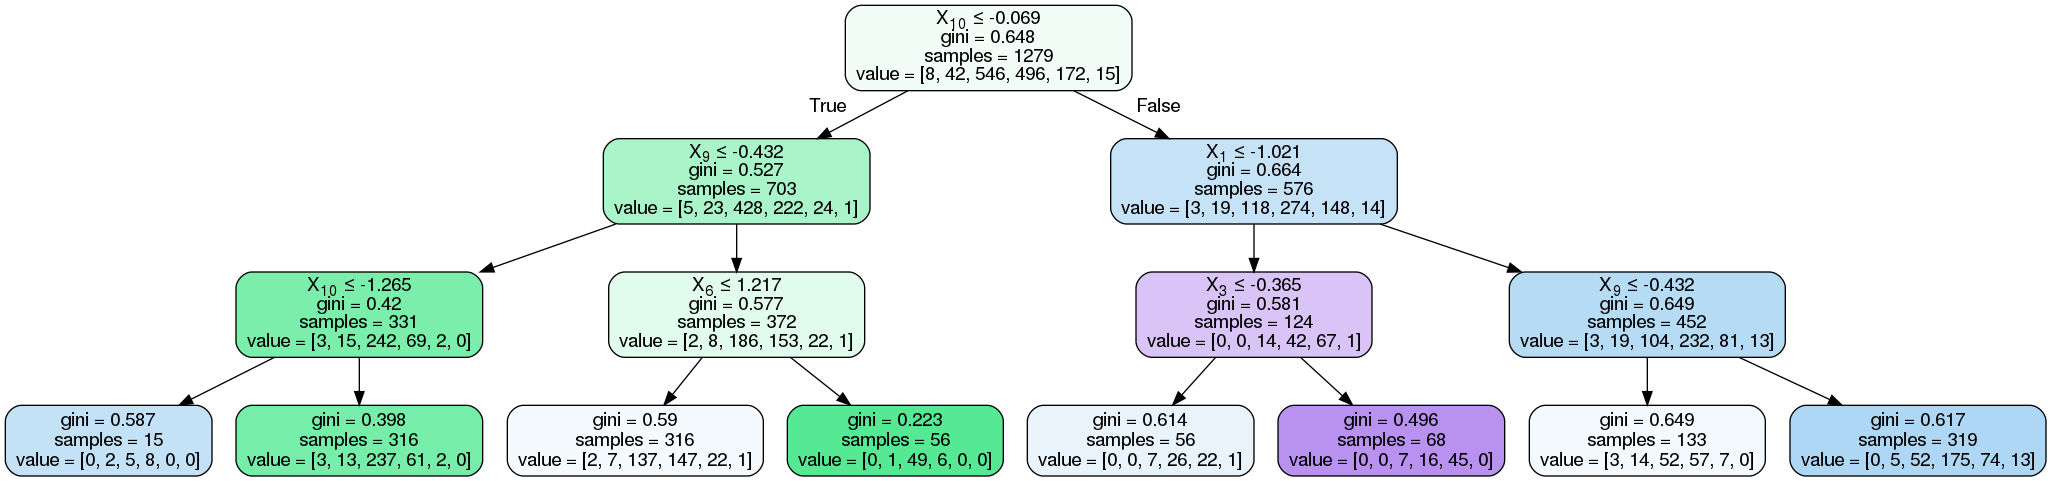

In [52]:
dot_data = export_graphviz(visual_model, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# 

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
train_acc_2 = []
test_acc_2 = []

depth = range(1,20)

for i in depth:
    model_3 = RandomForestClassifier(max_depth=i)
    model_3.fit(x_train,y_train)
    test_Acc = model_3.score(x_test,y_test)
    train_Acc = model_3.score(x_train,y_train)
    train_acc_2.append(train_Acc)
    test_acc_2.append(test_Acc)
    print("Train Accuracy For d= {} is : {:.2f}%".format(i,train_Acc*100))
    print("Test Accuracy For d= {} is : {:.2f}%".format(i,test_Acc*100))
    print()

Train Accuracy For d= 1 is : 56.92%
Test Accuracy For d= 1 is : 59.69%

Train Accuracy For d= 2 is : 58.95%
Test Accuracy For d= 2 is : 61.25%

Train Accuracy For d= 3 is : 62.55%
Test Accuracy For d= 3 is : 64.38%

Train Accuracy For d= 4 is : 66.93%
Test Accuracy For d= 4 is : 67.19%

Train Accuracy For d= 5 is : 69.43%
Test Accuracy For d= 5 is : 66.88%

Train Accuracy For d= 6 is : 75.06%
Test Accuracy For d= 6 is : 64.06%

Train Accuracy For d= 7 is : 81.78%
Test Accuracy For d= 7 is : 67.81%

Train Accuracy For d= 8 is : 85.30%
Test Accuracy For d= 8 is : 69.06%

Train Accuracy For d= 9 is : 91.56%
Test Accuracy For d= 9 is : 71.88%

Train Accuracy For d= 10 is : 96.40%
Test Accuracy For d= 10 is : 70.00%

Train Accuracy For d= 11 is : 98.28%
Test Accuracy For d= 11 is : 74.06%

Train Accuracy For d= 12 is : 99.30%
Test Accuracy For d= 12 is : 71.88%

Train Accuracy For d= 13 is : 99.92%
Test Accuracy For d= 13 is : 70.94%

Train Accuracy For d= 14 is : 99.92%
Test Accuracy For d

#### From Above we can say Max Test Accuracy we found is : 74.06% for depth =11

### For d=14 Test Accuracy

In [64]:
model_3 = RandomForestClassifier(max_depth=14,n_estimators=1000)
model_3.fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)
print("Test Accuracy For our model is : {:.2f}%".format(model_3.score(x_test,y_test)*100))

Test Accuracy For our model is : 72.81%


### Confusion matrix and classification report

[[  0   0   0   2   0   0]
 [  0   0   6   5   0   0]
 [  0   0 113  20   2   0]
 [  0   0  27 105  10   0]
 [  0   0   1   9  15   2]
 [  0   0   0   1   2   0]]


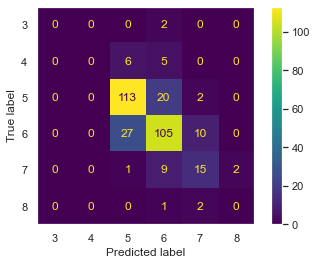

In [65]:
model_3_matrix = confusion_matrix(y_test,y_pred_3)
plot_confusion_matrix(model_3,x_test,y_test)
plt.grid(False)
print(model_3_matrix)

In [66]:
model_3_report = classification_report(y_test,y_pred_3)
print(model_3_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.84      0.80       135
           6       0.74      0.74      0.74       142
           7       0.52      0.56      0.54        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.70      0.73      0.71       320



### Prediction

In [67]:
y_test[10:16].to_numpy()

array([[5],
       [5],
       [6],
       [5],
       [6],
       [6]])

In [68]:
y_pred_3[10:16]

array([5, 5, 6, 6, 6, 7])

### Train Acc and Test Acc vs Depth

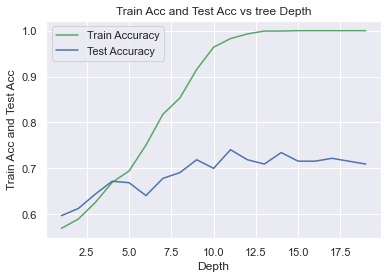

In [69]:
plt.plot(depth,train_acc_2,'g',label='Train Accuracy')
plt.plot(depth,test_acc_2,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs tree Depth")
plt.xlabel("Depth")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

#### Here only For Visualization We will draw a Random tree(only one Decision tree) of depth 3

In [70]:
visual_model = RandomForestClassifier(max_depth=3)
visual_model.fit(x_train,y_train)
r = visual_model.estimators_[0]

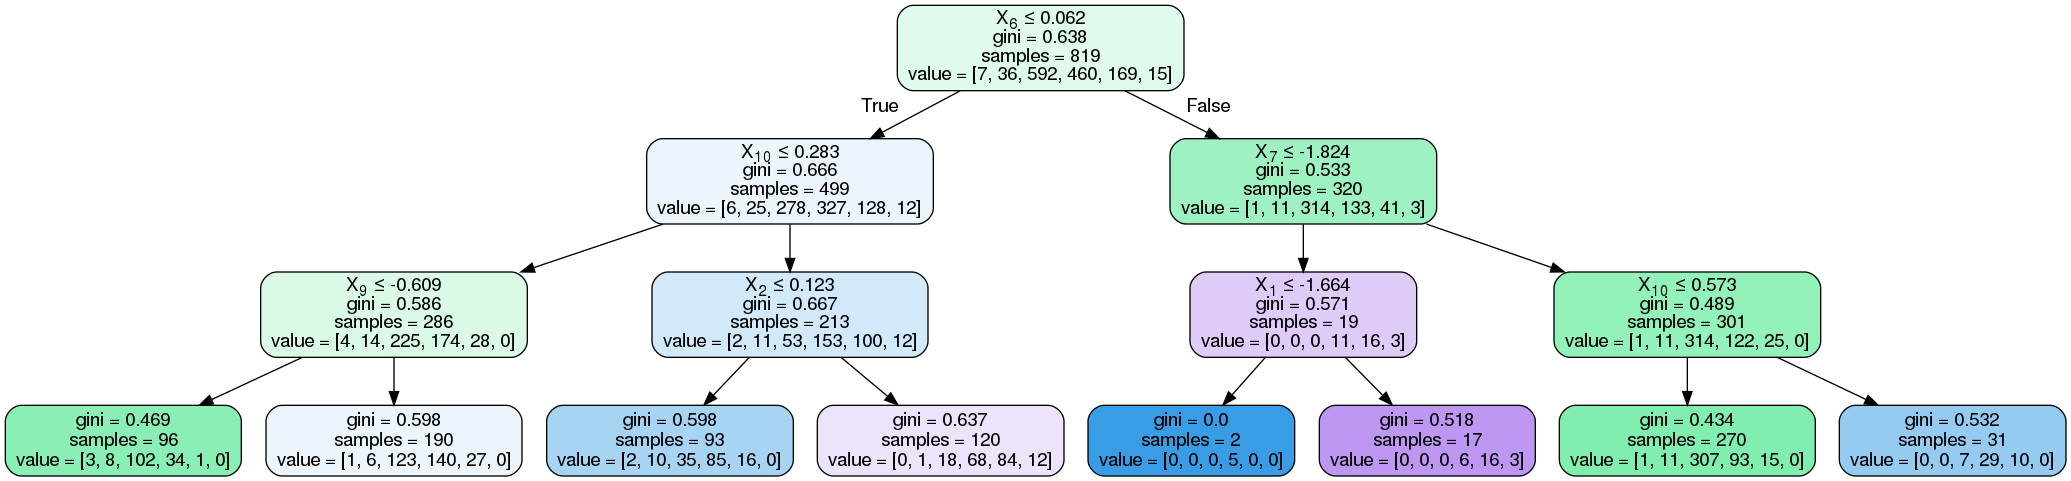

In [71]:
dot_data = export_graphviz(r, out_file=None,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# 

# Naive Bays Classifier

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
model_4 = GaussianNB()
model_4.fit(x_train,y_train)

GaussianNB()

In [74]:
train_Acc = model_4.score(x_train,y_train)
test_Acc = model_4.score(x_test,y_test)
print("Train accuracy for the Naive Bays model is : {}%".format(train_Acc*100))
print("Test accuracy for the Naive Bays model is : {}%".format(test_Acc*100))

Train accuracy for the Naive Bays model is : 54.96481626270524%
Test accuracy for the Naive Bays model is : 54.0625%


In [75]:
y_pred_4 = model_4.predict(x_test)

### Confusion matrix and classification report

[[ 0  0  1  1  0  0]
 [ 0  0  7  3  0  1]
 [ 2  5 85 35  8  0]
 [ 0  3 31 73 29  6]
 [ 1  0  0  9 15  2]
 [ 0  0  0  0  3  0]]


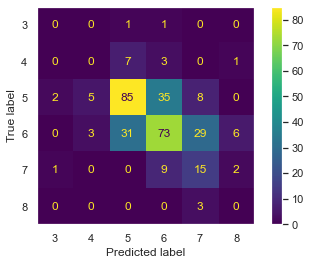

In [76]:
model_4_matrix = confusion_matrix(y_test,y_pred_4)
plot_confusion_matrix(model_4,x_test,y_test)
plt.grid(False)
print(model_4_matrix)

In [77]:
model_4_report = classification_report(y_test,y_pred_4)
print(model_4_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.63      0.66       135
           6       0.60      0.51      0.56       142
           7       0.27      0.56      0.37        27
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.26      0.28      0.26       320
weighted avg       0.58      0.54      0.55       320



### Prediction

In [78]:
y_test[10:16].to_numpy()

array([[5],
       [5],
       [6],
       [5],
       [6],
       [6]])

In [79]:
y_pred_4[10:16]

array([5, 5, 6, 4, 6, 7])

# 

# 

# Neural Network

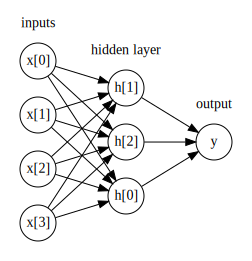

In [308]:
mglearn.plots.plot_single_hidden_layer_graph()

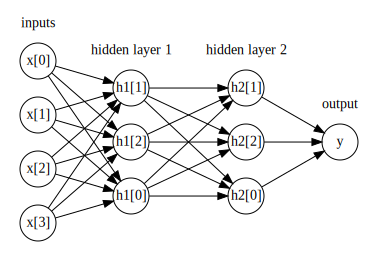

In [425]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

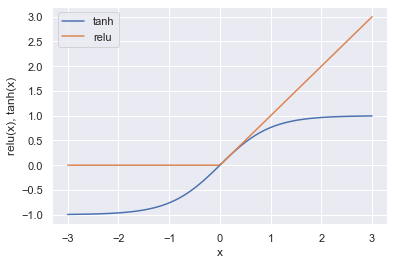

In [353]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
iterations = list(range(100,800,100))
mlp_train_acc = []
mlp_test_acc = []

for i in iterations:
    
    model_5 = MLPClassifier(random_state=0,max_iter=i)
    model_5.fit(x_train,y_train)
    test_Acc = model_5.score(x_test,y_test)
    train_Acc = model_5.score(x_train,y_train)
    mlp_train_acc.append(train_Acc)
    mlp_test_acc.append(test_Acc)
    print("Train Accuracy For iter= {} is : {:.2f}%".format(i,train_Acc*100))
    print("Test Accuracy For iter= {} is : {:.2f}%".format(i,test_Acc*100))
    print()   

Train Accuracy For iter= 100 is : 65.91%
Test Accuracy For iter= 100 is : 59.06%

Train Accuracy For iter= 200 is : 69.98%
Test Accuracy For iter= 200 is : 61.88%

Train Accuracy For iter= 300 is : 73.10%
Test Accuracy For iter= 300 is : 62.50%

Train Accuracy For iter= 400 is : 75.14%
Test Accuracy For iter= 400 is : 63.44%

Train Accuracy For iter= 500 is : 77.64%
Test Accuracy For iter= 500 is : 63.12%

Train Accuracy For iter= 600 is : 78.81%
Test Accuracy For iter= 600 is : 64.38%

Train Accuracy For iter= 700 is : 80.69%
Test Accuracy For iter= 700 is : 65.00%



In [82]:
mlp_pred = model_5.predict(x_test)
mlp_test_Acc = model_5.score(x_test,y_test)
print("Test Accuracy For MLP is : {:.2f}%".format(mlp_test_Acc*100))

Test Accuracy For MLP is : 65.00%


### Confusion matrix and classification report

[[  0   0   2   0   0   0]
 [  0   0   5   5   1   0]
 [  0   1 102  30   2   0]
 [  0   1  34  96  11   0]
 [  0   0   2  15  10   0]
 [  0   0   0   1   2   0]]


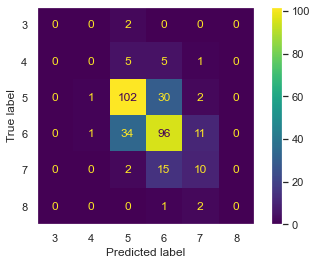

In [83]:
model_5_matrix = confusion_matrix(y_test,mlp_pred)
plot_confusion_matrix(model_5,x_test,y_test)
plt.grid(False)
print(model_5_matrix)

In [84]:
model_5_report = classification_report(y_test,mlp_pred)
print(model_5_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.76      0.73       135
           6       0.65      0.68      0.66       142
           7       0.38      0.37      0.38        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.62      0.65      0.63       320



### Prediction

In [85]:
y_test[10:16].to_numpy()

array([[5],
       [5],
       [6],
       [5],
       [6],
       [6]])

In [86]:
mlp_pred[10:16]

array([5, 6, 5, 5, 5, 7])

### Train Acc and Test Acc vs Iterations

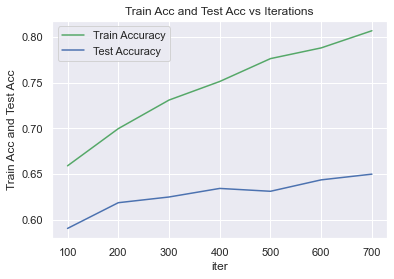

In [87]:
plt.plot(iterations,mlp_train_acc,'g',label='Train Accuracy')
plt.plot(iterations,mlp_test_acc,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs Iterations")
plt.xlabel("iter")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

### Changing Hidden Layer

In [88]:
model_5_1 = MLPClassifier(hidden_layer_sizes=[10,10],max_iter=1000,random_state=0)
model_5_1.fit(x_train,y_train)
mlp_pred_1 = model_5_1.predict(x_test)
mlp_test_Acc_1 = model_5_1.score(x_test,y_test)
print("Test Accuracy For MLP is : {:.2f}%".format(mlp_test_Acc_1*100))

Test Accuracy For MLP is : 61.25%


#### Changing Alpha Value

In [92]:
alpha_value = [0.00001,0.01,0.1,1,10]

for i in alpha_value:
    mlp = MLPClassifier(hidden_layer_sizes=[10,10],max_iter=1000,random_state=0,alpha=i)
    mlp.fit(x_train,y_train)
    score = mlp.score(x_test,y_test)
    print("Test Accuracy For MLP and alpha_value {} is : {:.2f}%".format(i,score*100))

Test Accuracy For MLP and alpha_value 1e-05 is : 63.12%
Test Accuracy For MLP and alpha_value 0.01 is : 61.56%
Test Accuracy For MLP and alpha_value 0.1 is : 63.12%
Test Accuracy For MLP and alpha_value 1 is : 61.56%
Test Accuracy For MLP and alpha_value 10 is : 63.12%


# 

# SVM

### How SVM Works

In [90]:
from mglearn.datasets import make_blobs

Text(0, 0.5, 'Feature 1')

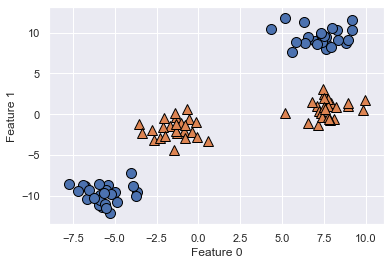

In [91]:
x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

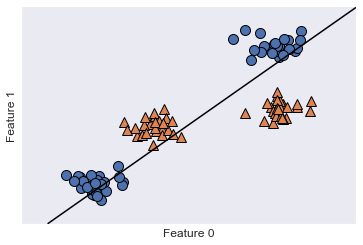

In [408]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)

mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### For Wine DataSet

In [93]:
from sklearn.svm import SVC

In [95]:
c_value = [0.0001 , 0.01,0.1,1,10,100,1000]

svc_train_acc = []
svc_test_acc = []

for i in c_value:
    model_6 = SVC(C=i)
    model_6.fit(x_train,y_train)
    test_Acc = model_6.score(x_test,y_test)
    train_Acc = model_6.score(x_train,y_train)
    svc_train_acc.append(train_Acc)
    svc_test_acc.append(test_Acc)
    print("Train Accuracy of SVC For C= {} is : {:.2f}%".format(i,train_Acc*100))
    print("Test Accuracy of SVC For C= {} is : {:.2f}%".format(i,test_Acc*100))
    print()   

Train Accuracy of SVC For C= 0.0001 is : 42.69%
Test Accuracy of SVC For C= 0.0001 is : 42.19%

Train Accuracy of SVC For C= 0.01 is : 42.69%
Test Accuracy of SVC For C= 0.01 is : 42.19%

Train Accuracy of SVC For C= 0.1 is : 58.72%
Test Accuracy of SVC For C= 0.1 is : 62.50%

Train Accuracy of SVC For C= 1 is : 66.61%
Test Accuracy of SVC For C= 1 is : 64.38%

Train Accuracy of SVC For C= 10 is : 78.26%
Test Accuracy of SVC For C= 10 is : 65.31%

Train Accuracy of SVC For C= 100 is : 91.71%
Test Accuracy of SVC For C= 100 is : 65.62%

Train Accuracy of SVC For C= 1000 is : 98.98%
Test Accuracy of SVC For C= 1000 is : 66.88%



In [96]:
model_6 = SVC(C=1000)
model_6.fit(x_train,y_train)

SVC(C=1000)

In [97]:
SVC_pred = model_6.predict(x_test)
svc_score = model_6.score(x_test,y_test)
print("Test Accuracy of SVC For is : {:.2f}%".format(svc_score*100))

Test Accuracy of SVC For is : 66.88%


### Confusion matrix and classification report

[[ 0  1  1  0  0  0]
 [ 0  1  4  6  0  0]
 [ 0  2 99 30  4  0]
 [ 0  3 33 98  8  0]
 [ 0  0  3  6 16  2]
 [ 0  0  0  2  1  0]]


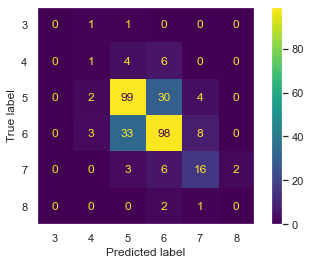

In [99]:
model_6_matrix = confusion_matrix(y_test,SVC_pred)
plot_confusion_matrix(model_6,x_test,y_test)
plt.grid(False)
print(model_6_matrix)

In [100]:
model_6_report = classification_report(y_test,SVC_pred)
print(model_6_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.09      0.11        11
           5       0.71      0.73      0.72       135
           6       0.69      0.69      0.69       142
           7       0.55      0.59      0.57        27
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.66      0.67      0.66       320



### Prediction

In [101]:
y_test[10:16].to_numpy()

array([[5],
       [5],
       [6],
       [5],
       [6],
       [6]])

In [102]:
SVC_pred[10:16]

array([5, 5, 6, 5, 6, 7])

### Train Acc and Test Acc vs C_value

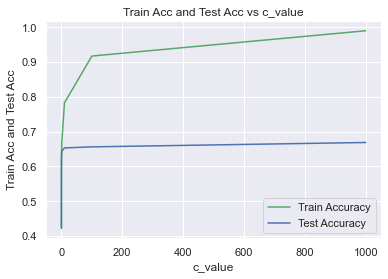

In [103]:
plt.plot(c_value,svc_train_acc,'g',label='Train Accuracy')
plt.plot(c_value,svc_test_acc,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs c_value")
plt.xlabel("c_value")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

### If we change gamma with constant C_value

In [104]:
gamma = [0.001,0.01,0.1,1,10,100,1000]

g_and_c_train = []
g_and_c_test = []

for g in gamma:
    
    svc = SVC(C=1000,gamma=g)
    svc.fit(x_train,y_train)
    test_Acc = svc.score(x_test,y_test)
    train_Acc = svc.score(x_train,y_train)
    g_and_c_train.append(train_Acc)
    g_and_c_test.append(test_Acc)
    print("Train Accuracy of SVC For C= 1000 and g = {} is : {:.2f}%".format(g,train_Acc*100))
    print("Test Accuracy of SVC For C= 1000 and g = {} is : {:.2f}%".format(g,test_Acc*100))
    print()   

Train Accuracy of SVC For C= 1000 and g = 0.001 is : 62.24%
Test Accuracy of SVC For C= 1000 and g = 0.001 is : 60.62%

Train Accuracy of SVC For C= 1000 and g = 0.01 is : 74.20%
Test Accuracy of SVC For C= 1000 and g = 0.01 is : 62.50%

Train Accuracy of SVC For C= 1000 and g = 0.1 is : 99.45%
Test Accuracy of SVC For C= 1000 and g = 0.1 is : 67.19%

Train Accuracy of SVC For C= 1000 and g = 1 is : 100.00%
Test Accuracy of SVC For C= 1000 and g = 1 is : 66.88%

Train Accuracy of SVC For C= 1000 and g = 10 is : 100.00%
Test Accuracy of SVC For C= 1000 and g = 10 is : 59.06%

Train Accuracy of SVC For C= 1000 and g = 100 is : 100.00%
Test Accuracy of SVC For C= 1000 and g = 100 is : 56.25%

Train Accuracy of SVC For C= 1000 and g = 1000 is : 100.00%
Test Accuracy of SVC For C= 1000 and g = 1000 is : 56.56%



### Train Acc and Test Acc vs Iterations

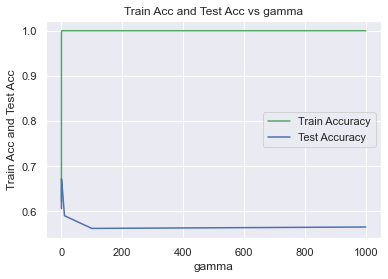

In [105]:
plt.plot(gamma,g_and_c_train,'g',label='Train Accuracy')
plt.plot(gamma,g_and_c_test,'b',label='Test Accuracy')
plt.title("Train Acc and Test Acc vs gamma")
plt.xlabel("gamma")
plt.ylabel("Train Acc and Test Acc")
plt.legend()
plt.colormaps()
plt.show()

### Thanks